In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter

In [4]:
df = pd.read_excel(r"Z:\Daria\IL-22 paper\3_Immunity revised paper\JJ TCGA\Rebuttal Letter JJ\Files\LUAD_pheno_analysis.xlsx", sheet_name = 0, index_col = 0)

In [5]:
df

,IL22RA1,IL22RA2,IL10RB,PVR,OS,OS.time,pathologic_stage,sample_type,Cluster,samples,...,MET,pathologic_M,pathologic_N,pathologic_T,additional_surgery_metastatic_procedure,additional_surgery_locoregional_procedure,additional_pharmaceutical_therapy,additional_radiation_therapy,histological_type,history_of_neoadjuvant_treatment
TCGA-78-7540-01,12.11,2.109,10.680,11.130,1,1197,Stage I,Primary Tumor,0,TCGA-78-7540-01,...,none,M0,N0,T2,NaN,NaN,NaN,NaN,Lung Bronchioloalveolar Carcinoma Mucinous,No
TCGA-55-7284-01,10.99,2.245,10.540,10.410,1,243,Stage II,Primary Tumor,0,TCGA-55-7284-01,...,NaN,MX,N0,T3,NO,NO,NO,NO,Lung Bronchioloalveolar Carcinoma Nonmucinous,No
TCGA-49-6742-01,10.34,1.695,10.500,10.120,1,488,Stage II,Primary Tumor,0,TCGA-49-6742-01,...,none,M0,N1,T2a,YES,NO,YES,NO,Mucinous (Colloid) Carcinoma,No
TCGA-44-6146-01,10.24,0.000,11.130,9.956,0,728,Stage II,Primary Tumor,0,TCGA-44-6146-01,...,none,M0,N0,T3,NaN,NO,YES,NO,Lung Mucinous Adenocarcinoma,No
TCGA-55-7728-01,10.22,4.491,10.690,9.954,0,704,Stage I,Primary Tumor,0,TCGA-55-7728-01,...,none,MX,N0,T2a,NaN,NaN,NaN,NaN,Mucinous (Colloid) Carcinoma,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-91-6828-01,0.00,5.687,9.739,10.070,0,323,Stage I,Primary Tumor,2,TCGA-91-6828-01,...,none,M0,N0,T1a,NaN,NaN,NaN,NaN,Lung Adenocarcinoma- Not Otherwise Specified (...,No
TCGA-55-7815-01,0.00,5.647,9.696,10.760,0,773,Stage I,Primary Tumor,2,TCGA-55-7815-01,...,none,MX,N0,T2a,NO,NO,YES,YES,Lung Adenocarcinoma- Not Otherwise Specified (...,No
TCGA-55-A48Y-01,0.00,4.494,9.649,10.880,0,630,Stage II,Primary Tumor,2,TCGA-55-A48Y-01,...,NaN,M0,N0,T2b,NaN,NaN,NaN,NaN,Lung Adenocarcinoma- Not Otherwise Specified (...,No
TCGA-44-2662-01,0.00,1.285,10.690,11.510,0,1280,Stage I,Primary Tumor,2,TCGA-44-2662-01,...,none,M0,N0,T2,NaN,NO,NaN,NaN,Lung Adenocarcinoma- Not Otherwise Specified (...,No


In [6]:
df_ls = df.loc[(df["pathologic_stage"]== "Stage I")|(df["pathologic_stage"]== "Stage II")] #low stages

In [7]:
df_hs = df.loc[(df["pathologic_stage"]== "Stage III")|(df["pathologic_stage"]== "Stage IV")] #advanced stages

In [8]:
df_hs["pathologic_stage"].value_counts()

Stage III    81
Stage IV     26
Name: pathologic_stage, dtype: int64

In [9]:
df_ls["pathologic_stage"].value_counts()

Stage I     270
Stage II    120
Name: pathologic_stage, dtype: int64

In [10]:
T = df["OS.time"]
E = df["OS"]
kmf = KaplanMeierFitter()

ls = (df["pathologic_stage"]== "Stage I")|(df["pathologic_stage"]== "Stage II")
hs = (df["pathologic_stage"]== "Stage III")|(df["pathologic_stage"]== "Stage IV")

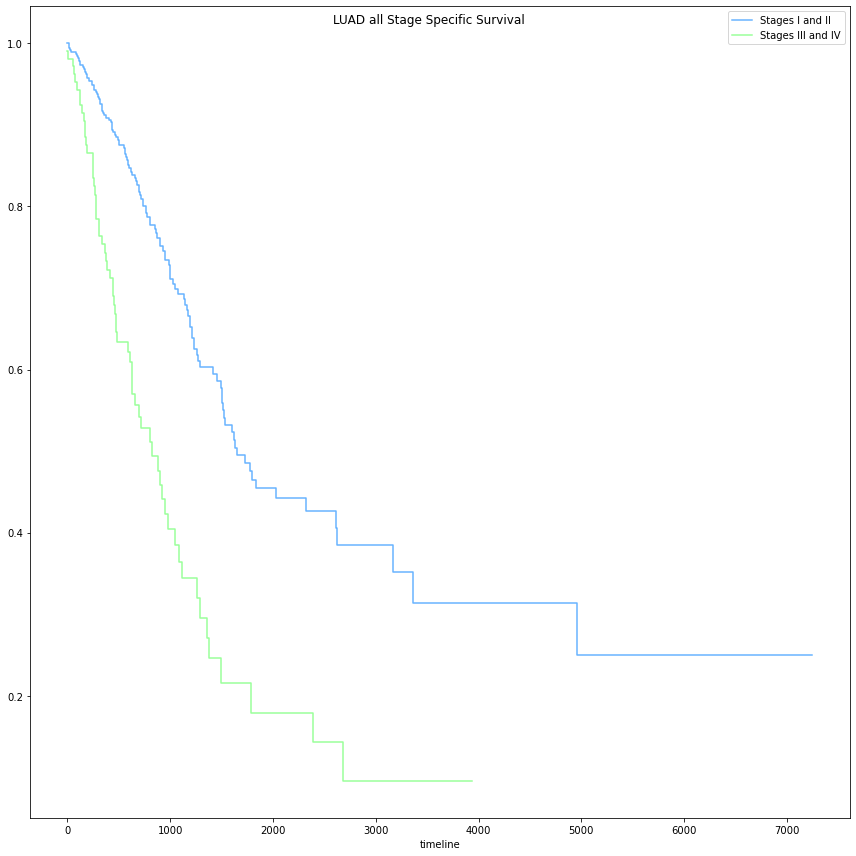

In [11]:
#plotting all cluster PFI times w/o confidence intervals for visibility

fig, (ax) = plt.subplots(nrows = 1, ncols = 1, sharex = True, figsize = (12, 12))

kmf0= KaplanMeierFitter()
ax = kmf0.fit(T[ls], E[ls], label="Stages I and II").plot(ax=ax, figsize = (12, 12), ci_show = False, color = "#66b3ff")

kmf1= KaplanMeierFitter()
ax = kmf1.fit(T[hs], E[hs], label="Stages III and IV").plot(ax=ax, figsize = (12, 12), ci_show = False, color = "#99ff99")

#kmf2= KaplanMeierFitter()
#ax = kmf2.fit(T[cl2], E[cl2], label="Cluster 2").plot(ax=ax, figsize = (12, 12), ci_show = False, color = "#ffcc99")
fig.suptitle("LUAD all Stage Specific Survival")
#plt.savefig(fname = "LUAD_PFI_clusters.svg", format = "svg")
plt.tight_layout()

In [12]:
# logrank test of cluster 1 vs cluster 2
from lifelines.statistics import logrank_test

results = logrank_test(T[ls], T[hs], E[ls], E[hs], alpha=.95)# logrank test of low stages vs high stages

results.print_summary()

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.95
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
          41.18 <0.005     32.74

In [13]:
T = df["OS.time"]
E = df["OS"]
kmf = KaplanMeierFitter()

ls_0 = ((df["pathologic_stage"]== "Stage I")|(df["pathologic_stage"]== "Stage II"))&(df["Cluster"]==0)
hs_0 = ((df["pathologic_stage"]== "Stage III")|(df["pathologic_stage"]== "Stage IV"))&(df["Cluster"]==0)

ls_1 = ((df["pathologic_stage"]== "Stage I")|(df["pathologic_stage"]== "Stage II"))&(df["Cluster"]==1)
hs_1 = ((df["pathologic_stage"]== "Stage III")|(df["pathologic_stage"]== "Stage IV"))&(df["Cluster"]==1)

ls_2 = ((df["pathologic_stage"]== "Stage I")|(df["pathologic_stage"]== "Stage II"))&(df["Cluster"]==2)
hs_2 = ((df["pathologic_stage"]== "Stage III")|(df["pathologic_stage"]== "Stage IV"))&(df["Cluster"]==2)

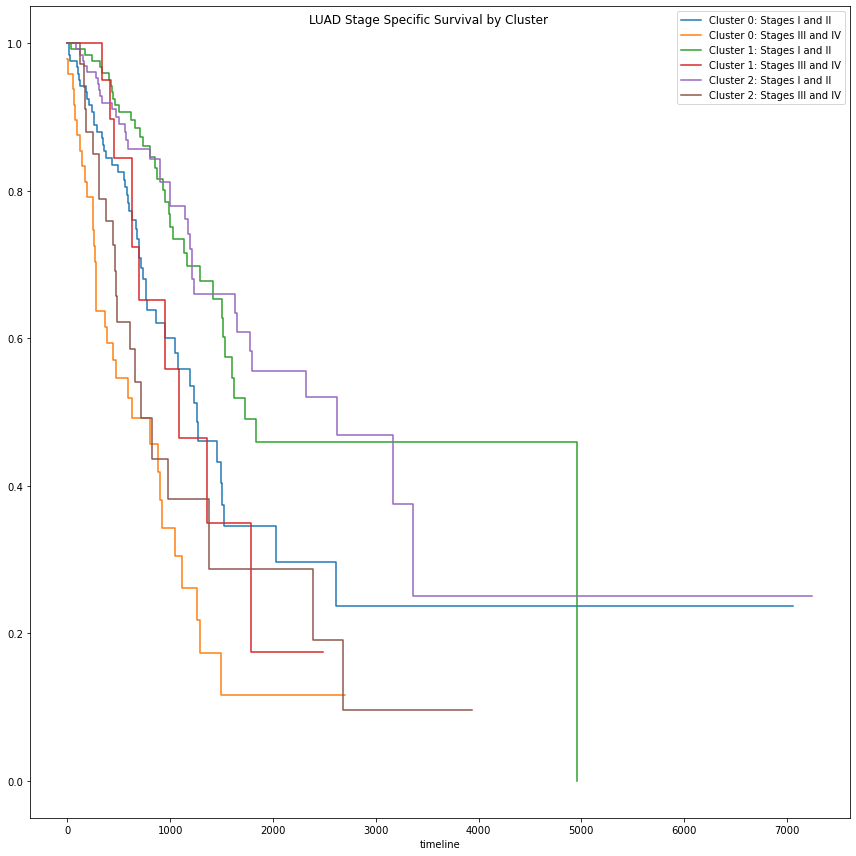

In [14]:
#plotting all cluster times w/o confidence intervals for visibility

fig, (ax) = plt.subplots(nrows = 1, ncols = 1, sharex = True, figsize = (12, 12))

kmf0= KaplanMeierFitter()
ax = kmf0.fit(T[ls_0], E[ls_0], label="Cluster 0: Stages I and II").plot(ax=ax, figsize = (12, 12), ci_show = False)

kmf1= KaplanMeierFitter()
ax = kmf1.fit(T[hs_0], E[hs_0], label="Cluster 0: Stages III and IV").plot(ax=ax, figsize = (12, 12), ci_show = False)

kmf2= KaplanMeierFitter()
ax = kmf2.fit(T[ls_1], E[ls_1], label="Cluster 1: Stages I and II").plot(ax=ax, figsize = (12, 12), ci_show = False)

kmf3= KaplanMeierFitter()
ax = kmf3.fit(T[hs_1], E[hs_1], label="Cluster 1: Stages III and IV").plot(ax=ax, figsize = (12, 12), ci_show = False)

kmf4= KaplanMeierFitter()
ax = kmf4.fit(T[ls_2], E[ls_2], label="Cluster 2: Stages I and II").plot(ax=ax, figsize = (12, 12), ci_show = False)

kmf5= KaplanMeierFitter()
ax = kmf5.fit(T[hs_2], E[hs_2], label="Cluster 2: Stages III and IV").plot(ax=ax, figsize = (12, 12), ci_show = False)

fig.suptitle("LUAD Stage Specific Survival by Cluster")
plt.savefig(fname = "LUAD_Stage_spec_surv_clusters.svg", format = "svg")
plt.tight_layout()

In [15]:
results_ls0_v_hs0 = logrank_test(T[ls_0], T[hs_0], E[ls_0], E[hs_0], alpha=.95)
results_ls1_v_hs1 = logrank_test(T[ls_1], T[hs_1], E[ls_1], E[hs_1], alpha=.95)
results_ls2_v_hs2 = logrank_test(T[ls_2], T[hs_2], E[ls_2], E[hs_2], alpha=.95)

results_ls0_v_ls1 = logrank_test(T[ls_0], T[ls_1], E[ls_0], E[ls_1], alpha=.95)
results_ls0_v_ls2 = logrank_test(T[ls_0], T[ls_2], E[ls_0], E[ls_2], alpha=.95)
results_ls1_v_ls2 = logrank_test(T[ls_1], T[ls_2], E[ls_1], E[ls_2], alpha=.95)

results_hs0_v_hs1 = logrank_test(T[hs_0], T[hs_1], E[hs_0], E[hs_1], alpha=.95)
results_hs0_v_hs2 = logrank_test(T[hs_0], T[hs_2], E[hs_0], E[hs_2], alpha=.95)
results_hs1_v_hs2 = logrank_test(T[hs_1], T[hs_2], E[hs_1], E[hs_2], alpha=.95)

results_ls0_v_hs1 = logrank_test(T[ls_0], T[hs_1], E[ls_0], E[hs_1], alpha=.95)
results_ls0_v_hs2 = logrank_test(T[ls_0], T[hs_2], E[ls_0], E[hs_2], alpha=.95)

results_ls1_v_hs0 = logrank_test(T[ls_1], T[hs_0], E[ls_1], E[hs_0], alpha=.95)
results_ls1_v_hs2 = logrank_test(T[ls_1], T[hs_2], E[ls_1], E[hs_2], alpha=.95)

results_ls2_v_hs0 = logrank_test(T[ls_2], T[hs_0], E[ls_2], E[hs_0], alpha=.95)
results_ls2_v_hs1 = logrank_test(T[ls_2], T[hs_1], E[ls_2], E[hs_1], alpha=.95)

In [16]:
results_ls0_v_hs0.print_summary()
results_ls1_v_hs1.print_summary() 
results_ls2_v_hs2.print_summary() 

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.95
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
          11.75 <0.005     10.68

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.95
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           4.95 0.03      5.26

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.95
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
          15.94 <0.005     13.90

In [17]:
results_ls0_v_ls1.print_summary() 
results_ls0_v_ls2.print_summary() 
results_ls1_v_ls2.print_summary() 

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.95
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
           8.49 <0.005      8.13

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.95
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
           8.29 <0.005      7.97

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.95
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           0.04 0.85      0.24

In [16]:
results_hs0_v_hs1.print_summary() 
results_hs0_v_hs2.print_summary() 
results_hs1_v_hs2.print_summary() 

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.95
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           0.00 0.94      0.08

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.95
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           0.01 0.91      0.13

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.95
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           0.03 0.86      0.22

In [17]:
results_ls0_v_hs1.print_summary()
results_ls0_v_hs2.print_summary()


<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.95
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
          38.01 <0.005     30.40

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.95
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
          42.79 <0.005     33.93

In [18]:
results_ls1_v_hs0.print_summary()
results_ls1_v_hs2.print_summary()

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.95
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
          49.62 <0.005     38.97

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.95
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
          53.00 <0.005     41.45

In [19]:
results_ls2_v_hs0.print_summary()
results_ls2_v_hs1.print_summary()

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.95
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
          45.61 <0.005     36.01

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.95
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
          43.54 <0.005     34.49

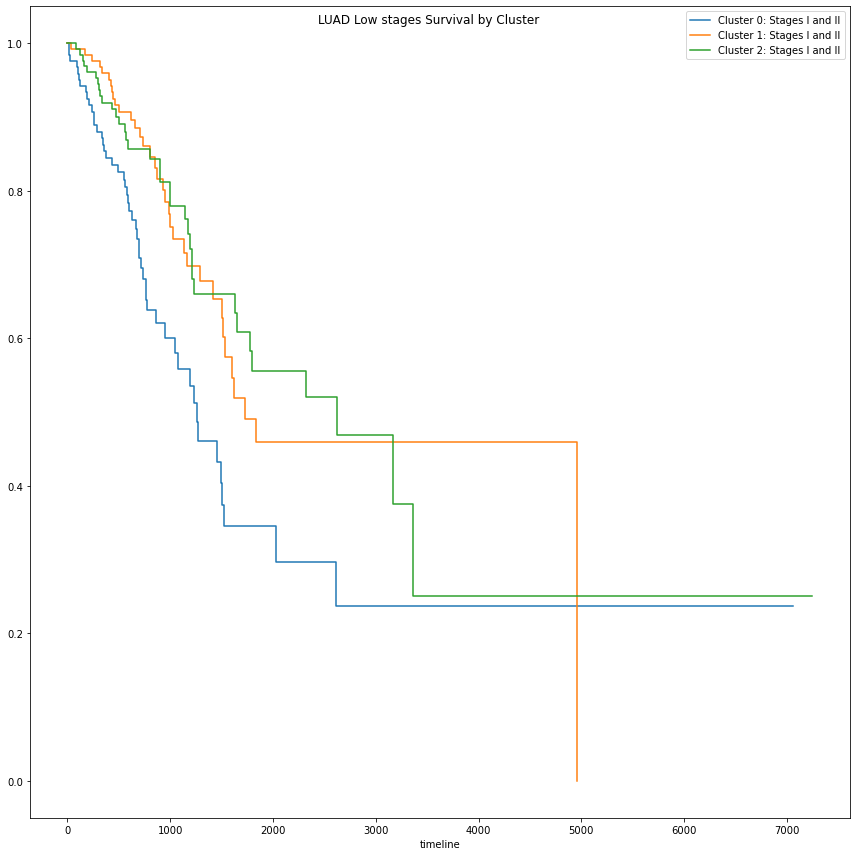

In [28]:
#plotting all cluster times w/o confidence intervals for visibility

fig, (ax) = plt.subplots(nrows = 1, ncols = 1, sharex = True, figsize = (12, 12))

kmf0= KaplanMeierFitter()
ax = kmf0.fit(T[ls_0], E[ls_0], label="Cluster 0: Stages I and II").plot(ax=ax, figsize = (12, 12), ci_show = False)



kmf2= KaplanMeierFitter()
ax = kmf2.fit(T[ls_1], E[ls_1], label="Cluster 1: Stages I and II").plot(ax=ax, figsize = (12, 12), ci_show = False)



kmf4= KaplanMeierFitter()
ax = kmf4.fit(T[ls_2], E[ls_2], label="Cluster 2: Stages I and II").plot(ax=ax, figsize = (12, 12), ci_show = False)


fig.suptitle("LUAD Low stages Survival by Cluster")
plt.savefig(fname = "LUAD_low_Stage_spec_surv_clusters.svg", format = "svg")
plt.tight_layout()

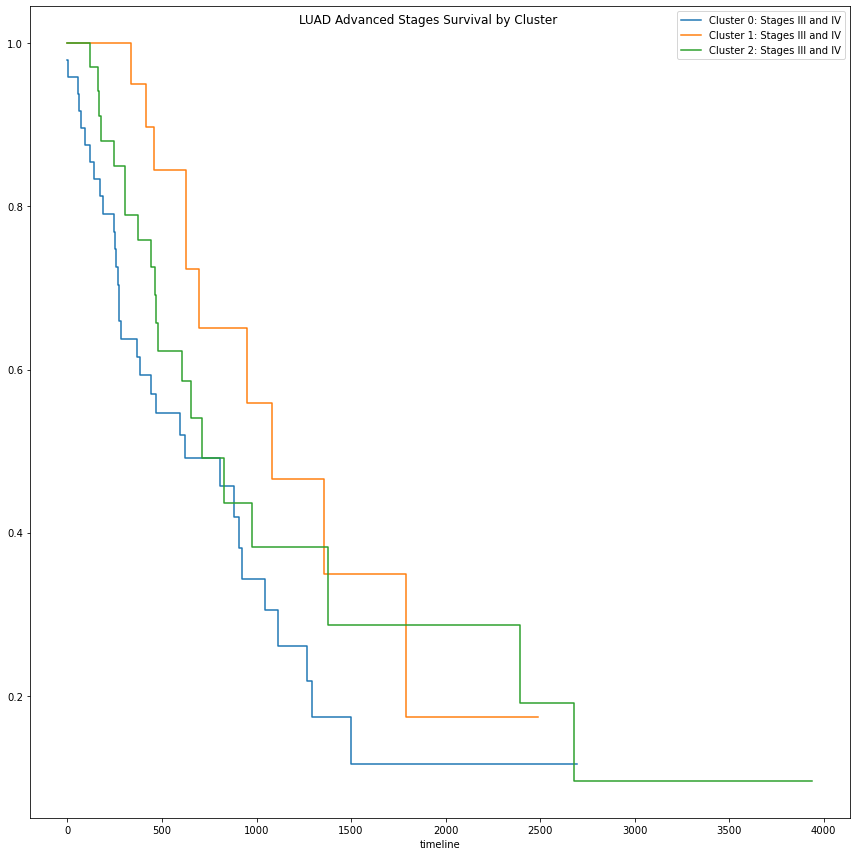

In [27]:
#plotting all cluster times w/o confidence intervals for visibility

fig, (ax) = plt.subplots(nrows = 1, ncols = 1, sharex = True, figsize = (12, 12))



kmf1= KaplanMeierFitter()
ax = kmf1.fit(T[hs_0], E[hs_0], label="Cluster 0: Stages III and IV").plot(ax=ax, figsize = (12, 12), ci_show = False)

kmf3= KaplanMeierFitter()
ax = kmf3.fit(T[hs_1], E[hs_1], label="Cluster 1: Stages III and IV").plot(ax=ax, figsize = (12, 12), ci_show = False)



kmf5= KaplanMeierFitter()
ax = kmf5.fit(T[hs_2], E[hs_2], label="Cluster 2: Stages III and IV").plot(ax=ax, figsize = (12, 12), ci_show = False)

fig.suptitle("LUAD Advanced Stages Survival by Cluster")
plt.savefig(fname = "LUAD__adv_Stage_spec_surv_clusters.svg", format = "svg")
plt.tight_layout()